# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np

In [2]:
# loading the twitter archieve csv data that we have downloaded
wrd_df = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# downloading the tweet image prediction data using requests
import requests
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
img = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(img.content)

img_df = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# import tweepy
# from tweepy import OAuthHandler
# import json
# from timeit import default_timer as timer

# # Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# # These are hidden to comply with Twitter's API terms and conditions
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

# # NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# # df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# # change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# # NOTE TO REVIEWER: this student had mobile verification issues so the following
# # Twitter API code was sent to this student from a Udacity instructor
# # Tweet IDs for which to gather additional data via Twitter's API
# tweet_ids = df_1.tweet_id.values
# len(tweet_ids)

# # Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [5]:
import json

# reading the tweet_json text file
tweet_list = []

with open('tweet-json.txt') as json_file:
    for l in json_file:
        tweet_dict = {}
        tweet_json = json.loads(l)
        
        try: 
            tweet_dict['tweet_id'] = tweet_json['extended_entities']['media'][0]['id']
        except:
            tweet_dict['tweet_id'] = 'nil'
            
        tweet_dict['retweet_count'] = tweet_json['retweet_count']
        tweet_dict['fav_count'] = tweet_json['favorite_count']
        
        tweet_list.append(tweet_dict)
    
tweet_df = pd.DataFrame(tweet_list)[['tweet_id', 'retweet_count', 'fav_count']]

## Assessing Data of our datasets

### We will now do a quick assessment of the three datasets we have gathered earlier
They are:
1. image_prediction
2. twitter-archive-enhanced
3. tweet-json


In [6]:
# first we define a function for high level summary exploration
def summary(df: pd.DataFrame) -> pd.DataFrame:
    """
    Returns the data type, # of null rows and unique rows of a given dataframe
    
    Args: 
        A dataframe of n_rows and n_columns
    Returns:
        A dataframe of 4 columns [data_type, non-null-rows, unique_rows, missing_rows]
    """
    concat = pd.concat(
        [df.dtypes.to_frame(), df.count().to_frame(), df.nunique(), df.isnull().sum()], axis=1
    )
    concat.columns = ['data_type', 'non-null-rows', 'unique_rows', 'missing_rows']
    return concat

We will new investigate the following datasets.

In [7]:
# twitter-archive-enhanced
summary(wrd_df)

,data_type,non-null-rows,unique_rows,missing_rows
tweet_id,int64,2356,2356,0
in_reply_to_status_id,float64,78,77,2278
in_reply_to_user_id,float64,78,31,2278
timestamp,object,2356,2356,0
source,object,2356,4,0
text,object,2356,2356,0
retweeted_status_id,float64,181,181,2175
retweeted_status_user_id,float64,181,25,2175
retweeted_status_timestamp,object,181,181,2175
expanded_urls,object,2297,2218,59


In [8]:
wrd_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1155,724983749226668032,NaN,NaN,2016-04-26 15:29:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Fred-Rick. He dabbles in parkour. The ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/724983749...,12,10,Fred,None,None,None,None
1489,692905862751522816,NaN,NaN,2016-01-29 03:03:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Wally. He's being abducted by aliens. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/692905862...,10,10,Wally,None,None,pupper,None
1513,691096613310316544,NaN,NaN,2016-01-24 03:14:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we see one dog giving a puptalk to anothe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/691096613...,11,10,None,None,None,None,None
1914,674330906434379776,6.658147e+17,16374678.0,2015-12-08 20:53:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10\n@ABC7,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
357,830173239259324417,NaN,NaN,2017-02-10 21:54:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Kyro. He's a Stratocumu...,8.092201e+17,4.196984e+09,2016-12-15 02:14:29 +0000,https://twitter.com/dog_rates/status/809220051...,12,10,Kyro,None,None,None,None


In [9]:
# image prediction
summary(img_df)

,data_type,non-null-rows,unique_rows,missing_rows
tweet_id,int64,2075,2075,0
jpg_url,object,2075,2009,0
img_num,int64,2075,4,0
p1,object,2075,378,0
p1_conf,float64,2075,2006,0
p1_dog,bool,2075,2,0
p2,object,2075,405,0
p2_conf,float64,2075,2004,0
p2_dog,bool,2075,2,0
p3,object,2075,408,0


In [10]:
img_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1166,735635087207878657,https://pbs.twimg.com/media/CjWANBlVAAAaN-a.jpg,1,pug,0.891871,True,goose,0.014377,False,fur_coat,0.008451,False
1440,774757898236878852,https://pbs.twimg.com/media/CsB-MYiXgAEQU20.jpg,1,toy_poodle,0.719941,True,miniature_poodle,0.251546,True,Lakeland_terrier,0.007008,True
1380,765222098633691136,https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg,1,dalmatian,0.556595,True,whippet,0.151047,True,American_Staffordshire_terrier,0.096435,True
853,696405997980676096,https://pbs.twimg.com/media/Caohi_hWcAAQCni.jpg,1,borzoi,0.132845,True,Walker_hound,0.086005,True,Great_Pyrenees,0.065582,True
213,670040295598354432,https://pbs.twimg.com/media/CUx2F6lVEAAvFev.jpg,1,web_site,0.901552,False,borzoi,0.026660,True,Chihuahua,0.012438,True


In [11]:
# twitter dataset
summary(tweet_df)

,data_type,non-null-rows,unique_rows,missing_rows
tweet_id,object,2354,2009,0
retweet_count,int64,2354,1724,0
fav_count,int64,2354,2007,0


In [12]:
tweet_df.sample(5)

,tweet_id,retweet_count,fav_count
5,891087942176911360,3261,20562
698,nil,3352,8930
1723,679935050679468032,994,2818
655,nil,4432,0
421,780601293052190720,3839,0


### Quality issues
1. **WeRateDogs dataset**: (Consistency) There are instances where the rating denominator is lower than the rating nominator, which should not be the case as the denominator should be the "maximum" rating.


2. **WeRateDogs dataset**: (Consistency) There are some columns that represent the same thing but with slight variation (e.g, source & expanded_urls). 


3. **All Datasets**: (Consistency) Tweet_id data type is not standardized across all datasets (e.g, int64, int64, object)


4. **WeRateDogs dataset**: (Accuracy) name column in the dataset, which we assume refers to the dog name is not very clean in a sense that there are names such as 'a' which might be an input error.


5. **Image Prediction Dataset**: (Validity) There are columns named p1, p2, p3 which are all different predictions of objects/animals/dogs


6. **WeRateDogs dataset**: (Accuracy) datatypes are not declared correctly for some columns (e.g, timestamp should be a datetime type rather than object)


7. **Tweet-json dataset**: (Consistency) There are several rows of tweets without a tweet_id but have been assigned a 'nil' when we populated the json file into a dataframe previously


8. **WeRateDogs dataset**: (Validity) After fixing the rating denominator, the old columns column will become redundant because the rating in the new column is relative to the other ratings


9. Removing null rows in certain columns (e.g, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

### Tidiness/Structural issues
1. **WeRateDogs dataset**: The 4 columns (i.e, dogoo, floofer, pupper & puppo), which refers to the dog stage is a single variable, and should be combined into a single column, however, currently it has been spread across 4 columns.

2. **All Datasets** Has several redundant columns. Also, we can join these 3 tables together on tweet_id to reduce the need for redundant tables.


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. The issues will be cleaned in the following order.

1. Quality issue #3 - consistency in dataset (tweet_id - int64, int64, object)
2. Quality issue #7 - several rows of data do not have a tweet_id but have been assigned "nil"
3. Tidiness/Structural Issue #2 - Combining all three tables into a master dataset

In [13]:
## Making copies of original pieces of data
wrd_clean = wrd_df.copy() # we rate dogs
img_clean = img_df.copy() # prediction img 
tweet_clean = tweet_df.copy() # twitter fav/retweet

### Issue #1: Redundant tables which can be joined together

#### Define

Issues resolved in this step:
1. Quality issue #3 - consistency in dataset (tweet_id - int64, int64, object)
2. Quality issue #7 - several rows of data do not have a tweet_id but have been assigned "nil"
2. Tidiness/Structural Issue #2 - Combining all three tables into a master

#### Code

In [14]:
# investigating the columns of each dataframe
print(f'{wrd_df.columns}\n{img_df.columns}\n{tweet_df.columns}')

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')
Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')
Index(['tweet_id', 'retweet_count', 'fav_count'], dtype='object')


In [15]:
# converting tweet_id into string object type to facilitate merging
wrd_df = wrd_df.astype({'tweet_id': "str"})
img_df = img_df.astype({'tweet_id': "str"})
# merging the first we rate dogs dataset with image prediction first
wrd_img_df = wrd_df.merge(img_df, on='tweet_id', how='left')
# resolving column datatype issue so that we can merge them together (tweet_id)
cleaned_tweet_df = tweet_df[tweet_df['tweet_id']!='nil']
# casting tweet_id into consistent data type
cleaned_tweet_df = cleaned_tweet_df.astype({'tweet_id': 'str'})
# merging the columns now, creating a master dataset
main_df = wrd_img_df.merge(cleaned_tweet_df, on='tweet_id', how='left')
main_df.sample(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,fav_count
1225,714141408463036416,NaN,NaN,2016-03-27 17:25:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I know we only rate dogs, but since it's Easte...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/714141408...,...,0.586951,True,golden_retriever,0.378812,True,redbone,0.003605,True,NaN,NaN
1435,697259378236399616,NaN,NaN,2016-02-10 03:22:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please stop sending in saber-toothed tigers. T...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/697259378...,...,0.999223,True,boxer,0.000187,True,whippet,0.000151,True,NaN,NaN


#### Test

In [16]:
# checking if all tables have been properly joined together
main_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'fav_count'],
      dtype='object')

Seems like the tables have been successfully merged into a master dataset based on tweet_id

### Issue #2: Fixing the dog rating column (rating_numerator and denominator)


#### Define

Issues resolved in this step:
1. Quality issue #1 - there are a number of numerator that are exceedingly high, we will attempted to normalize it
2. Quality issue #8 - Redundant columns after fixing dog rating columns (rating_numerator and rating denominator) 


#### Code

In [17]:
rating_cleaned_main_df = (
    main_df
    # create a new column for the rating
    .assign(doggo_rating=lambda x: x.rating_numerator/x.rating_denominator)
    .drop(columns=['rating_numerator', 'rating_denominator'])
)

#### Test

Check the following:
1. a new rating column has been created
2. redundant rating columns has been removed

In [18]:
# checking new rating column
rating_cleaned_main_df['doggo_rating'].sample(5)

1344    1.2
1753    1.2
1623    1.1
838     1.2
326     1.3
Name: doggo_rating, dtype: float64

In [19]:
# checking if redundant rating columns have been removed
rating_cleaned_main_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'name', 'doggo',
       'floofer', 'pupper', 'puppo', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'retweet_count', 'fav_count', 'doggo_rating'],
      dtype='object')

### Issue #3: Clean up the predicted dog breed columns (p1, p2, p3) based on the highest confidence score


#### Define

Issues resolved in this step:

1. Quality issue #5 - **Image Prediction Dataset**: (Validity) There are columns named p1, p2, p3 which are all different predictions, we will combine them into 1 column using the prediction with the highest confidence score
2. Remove rows with NaN or None dog breed classification for tidiness

In [20]:
rating_cleaned_main_df['doggo_breed'] = 'None'

for i, row in rating_cleaned_main_df.iterrows():
    if row.p1_dog:
        rating_cleaned_main_df.set_value(i, 'doggo_breed', row.p1)
    elif row.p2_dog:
        rating_cleaned_main_df.set_value(i, 'doggo_breed', row.p2)
    elif row.p3_dog:
        rating_cleaned_main_df.set_value(i, 'doggo_breed', row.p3)
    else:
        rating_cleaned_main_df.set_value(i, 'doggo_breed', 'None')

rating_cleaned_main_df.doggo_breed.value_counts()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


None                           324
golden_retriever               173
Labrador_retriever             113
Pembroke                        96
Chihuahua                       95
pug                             65
toy_poodle                      52
chow                            51
Samoyed                         46
Pomeranian                      42
cocker_spaniel                  34
malamute                        34
French_bulldog                  32
Chesapeake_Bay_retriever        31
miniature_pinscher              26
Cardigan                        23
Eskimo_dog                      22
Staffordshire_bullterrier       22
German_shepherd                 21
beagle                          21
Shih-Tzu                        20
Siberian_husky                  20
kuvasz                          19
Lakeland_terrier                19
Shetland_sheepdog               19
Maltese_dog                     19
Rottweiler                      19
Italian_greyhound               17
basset              

#### Test

Check the following:
1. A correct dog breed has been assigned based on the highest confidence score
2. Removed doggo_breed that are NaN

In [21]:
# high level overview of the predictions and the respective assigned dog breed based on confidence
rating_cleaned_main_df[['p1','p2','p3','p1_conf','p2_conf','p3_conf','doggo_breed']].sample(10)

,p1,p2,p3,p1_conf,p2_conf,p3_conf,doggo_breed
1580,pug,Chihuahua,Shih-Tzu,0.178205,0.149164,0.120505,pug
1750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1140,Border_collie,collie,Eskimo_dog,0.462408,0.214556,0.035604,Border_collie
1296,toy_poodle,miniature_poodle,teddy,0.908491,0.082652,0.005786,toy_poodle
1160,Siamese_cat,pug,quilt,0.950526,0.018877,0.007628,pug
1288,muzzle,basenji,Boston_bull,0.243890,0.187158,0.092727,basenji
1040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
786,toy_poodle,miniature_poodle,Lakeland_terrier,0.719941,0.251546,0.007008,toy_poodle
723,seat_belt,golden_retriever,Labrador_retriever,0.474292,0.171393,0.110592,golden_retriever
427,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
# we will need to remove doggo_breeds that are None, NaN to tidy up the dataset
# first we check the number of rows with "None" and Null (NaN)
rating_cleaned_main_df.query('doggo_breed == "None"')['doggo_breed'].count()

324

In [23]:
# next, we look at doggo breeds that are Null (NaN)
rating_cleaned_main_df['doggo_breed'].isna().sum()

281

In [24]:
# we will go ahead and remove these data issues
breed_cleaned_main_df = (
    rating_cleaned_main_df
    # remove NaN
    .dropna(subset=['doggo_breed'])
)

none_count = breed_cleaned_main_df.query('doggo_breed == "None"')['doggo_breed'].count()

print(f'Number of NaN rows: {breed_cleaned_main_df.doggo_breed.isna().sum()}\nNumber of None rows: {none_count}')

Number of NaN rows: 0
Number of None rows: 324


We do not remove "none" rows as there might be other useful columns in the same row.

### Issue #4: General cleanup of the master dataset


#### Define

Issues resolved in this step:

1. Quality issue #2 - removing redundant columns (preserving expanded_url, dropping source)
2. Quality issue #4 - fixing naming issues in "name" column as some have weird alphabets
3. Quality issue #6 - fixing datatypes of certain columns (timestamp)
4. Tidiness/Structural issue #1 - removing unecessary columns

In [25]:
# replacing None with empty strings
breed_cleaned_main_df.doggo.replace('None', '', inplace=True)
breed_cleaned_main_df.floofer.replace('None', '', inplace=True)
breed_cleaned_main_df.pupper.replace('None', '', inplace=True)
breed_cleaned_main_df.puppo.replace('None', '', inplace=True)

# combining the different columns into a 'stage' column
breed_cleaned_main_df['stage'] = (
    breed_cleaned_main_df.doggo +
    breed_cleaned_main_df.floofer +
    breed_cleaned_main_df.pupper +
    breed_cleaned_main_df.puppo
)

# formatting entires with multiple dog stages 
breed_cleaned_main_df.loc[breed_cleaned_main_df.stage == 'doggopupper', 'stage'] = 'doggo,pupper'
breed_cleaned_main_df.loc[breed_cleaned_main_df.stage == 'doggopuppo', 'stage'] = 'doggo,puppo'
breed_cleaned_main_df.loc[breed_cleaned_main_df.stage == 'doggofloofer', 'stage'] = 'doggo,floofer'

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

In [26]:
# removing Null
breed_cleaned_main_df = breed_cleaned_main_df[breed_cleaned_main_df.retweeted_status_id.isnull()]
breed_cleaned_main_df = breed_cleaned_main_df[breed_cleaned_main_df.retweeted_status_user_id.isnull()]
breed_cleaned_main_df = breed_cleaned_main_df[breed_cleaned_main_df.retweeted_status_timestamp.isnull()]

breed_cleaned_main_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,fav_count,doggo_rating,doggo_breed,stage
1695,681261549936340994,NaN,NaN,2015-12-27 23:53:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Panda. He's a Quackadilly Shooste...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681261549...,...,0.095429,True,Maltese_dog,0.065738,True,NaN,NaN,0.9,Tibetan_terrier,
1328,705970349788291072,NaN,NaN,2016-03-05 04:17:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lucy. She's a Venetian Kerploof. Suppo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/705970349...,...,0.112413,True,chow,0.036953,True,NaN,NaN,1.2,golden_retriever,
744,780192070812196864,NaN,NaN,2016-09-25 23:47:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780192070...,...,0.091474,False,hatchet,0.073545,False,NaN,NaN,1.1,vizsla,
2305,666837028449972224,NaN,NaN,2015-11-18 04:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My goodness. Very rare dog here. Large. Tail d...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666837028...,...,0.114071,False,common_iguana,0.043255,False,NaN,NaN,0.3,None,
988,748977405889503236,NaN,NaN,2016-07-01 20:31:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",What jokester sent in a pic without a dog in i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748977405...,...,0.152810,True,English_setter,0.051835,True,NaN,NaN,1.0,German_short-haired_pointer,


In [27]:
# in this code block, we will be fixing the issue of redundant columns
final_df = (
    breed_cleaned_main_df[['tweet_id', 
                           'timestamp', 
                           'text', 
                           'expanded_urls', 
                           'name',
                           'jpg_url',
                           'img_num',
                           'retweet_count',
                           'fav_count',
                           'doggo_rating',
                           'doggo_breed',
                           'stage']]
)
final_df.sample(5)

,tweet_id,timestamp,text,expanded_urls,name,jpg_url,img_num,retweet_count,fav_count,doggo_rating,doggo_breed,stage
13,889638837579907072,2017-07-25 00:10:02 +0000,This is Ted. He does his best. Sometimes that'...,https://twitter.com/dog_rates/status/889638837...,Ted,https://pbs.twimg.com/media/DFihzFfXsAYGDPR.jpg,1.0,NaN,NaN,1.2,French_bulldog,
874,761292947749015552,2016-08-04 20:09:17 +0000,Meet Bonaparte. He's pupset because it's cloud...,https://twitter.com/dog_rates/status/761292947...,Bonaparte,https://pbs.twimg.com/media/CpCn5aXXgAAOPTm.jpg,1.0,NaN,NaN,1.1,standard_poodle,
149,863079547188785154,2017-05-12 17:12:53 +0000,Ladies and gentlemen... I found Pipsy. He may ...,https://twitter.com/dog_rates/status/863079547...,None,https://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg,1.0,NaN,NaN,1.4,Lakeland_terrier,
2022,672068090318987265,2015-12-02 15:01:33 +0000,Say hello to Gizmo. He's upset because he's no...,https://twitter.com/dog_rates/status/672068090...,Gizmo,https://pbs.twimg.com/media/CVOqW8eUkAESTHj.jpg,1.0,NaN,NaN,0.7,pug,
1855,675531475945709568,2015-12-12 04:23:49 +0000,This is Ellie AKA Queen Slayer of the Orbs. Ve...,https://twitter.com/dog_rates/status/675531475...,Ellie,https://pbs.twimg.com/media/CV_4ShmUYAA3wNu.jpg,1.0,NaN,NaN,1.0,Pembroke,


In [28]:
# in this block, we will be fixing the issue of datatypes
final_df.dtypes

tweet_id          object
timestamp         object
text              object
expanded_urls     object
name              object
jpg_url           object
img_num          float64
retweet_count    float64
fav_count        float64
doggo_rating     float64
doggo_breed       object
stage             object
dtype: object

In [29]:
final_df = final_df.astype({'timestamp': 'datetime64[ns]'})
# checking if datatype has been fixed
final_df.dtypes

tweet_id                 object
timestamp        datetime64[ns]
text                     object
expanded_urls            object
name                     object
jpg_url                  object
img_num                 float64
retweet_count           float64
fav_count               float64
doggo_rating            float64
doggo_breed              object
stage                    object
dtype: object

In [30]:
# finally in this code block, we will be fixing the naming issues of certain dogs
# to going about to solving this, we will be replacing weird names into None

final_df.name = (
    final_df.name
    .str
    .replace('^[a-z]+', 'None')
)

final_df.name.value_counts()

None        644
Charlie      11
Cooper       10
Lucy         10
Oliver       10
Penny         9
Tucker        9
Winston       8
Sadie         8
Daisy         7
Toby          7
Lola          7
Jax           6
Bo            6
Stanley       6
Bella         6
Koda          6
Scout         5
Leo           5
Louis         5
Buddy         5
Rusty         5
Chester       5
Oscar         5
Milo          5
Dave          5
Bailey        5
Clark         4
Gary          4
Jack          4
           ... 
Corey         1
Ralphson      1
Bradlay       1
Cilantro      1
Stu           1
Lilly         1
Crawford      1
Ozzie         1
Buckley       1
River         1
Cal           1
Lorelei       1
Bradley       1
Jennifur      1
Edgar         1
Aqua          1
JD            1
Simba         1
Tedrick       1
Anakin        1
Tycho         1
Sparky        1
Oreo          1
Kallie        1
Walker        1
Hurley        1
Bluebert      1
Alfy          1
Billl         1
Sweet         1
Name: name, Length: 914,

Seems like a majority of dog names were an issue and subsequently coalesced into "None"

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [31]:
# storing the final dataset into a csv
final_df.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')

## Analyzing and Visualizing Data

In [32]:
summary(final_df)

,data_type,non-null-rows,unique_rows,missing_rows
tweet_id,object,1994,1994,0
timestamp,datetime64[ns],1994,1994,0
text,object,1994,1994,0
expanded_urls,object,1994,1994,0
name,object,1994,914,0
jpg_url,object,1994,1994,0
img_num,float64,1994,4,0
retweet_count,float64,0,0,1994
fav_count,float64,0,0,1994
doggo_rating,float64,1994,23,0


In [33]:
# importing the necessary libraries for visualization and analysis
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Define default chart size for all visualizations

In [34]:
# define the default chart size for all our visualizations
plt.rcParams["figure.figsize"] = (9,7)

## Visualization 1: Scatter plot between retweets and favourites

Text(0.5,0,'Favourites')

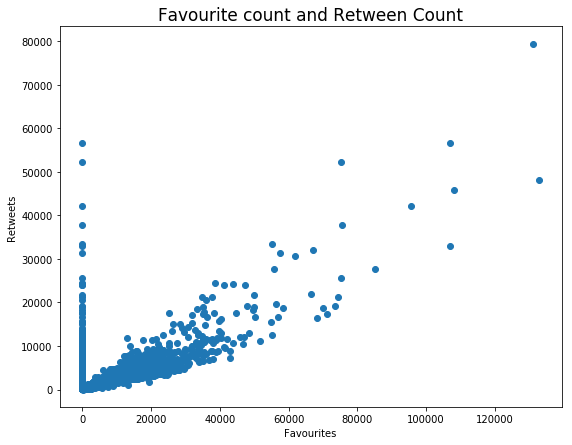

In [35]:
# scatter plot showing the relationship
plt.scatter(tweet_df.fav_count, tweet_df.retweet_count)
# naming the line chart
plt.title("Favourite count and Retween Count", fontsize=17)
# adding y-axis labels
plt.ylabel('Retweets')
# adding x-axis labels
plt.xlabel('Favourites')

## Visualization 2: Frequency of most rated dog breeds

Text(0.5,0,'Dog Breed')

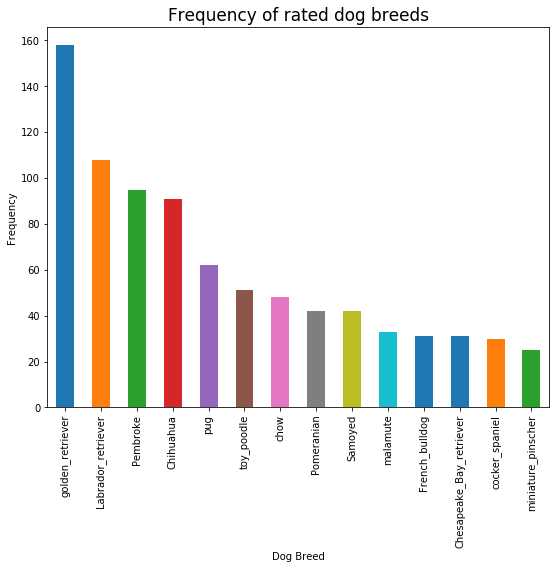

In [39]:
doggo_breed_vis = final_df.query('doggo_breed != "None"')
doggo_breed_vis = doggo_breed_vis.groupby('doggo_breed').filter(lambda x: len(x) >= 25)
doggo_breed_vis['doggo_breed'].value_counts().plot(kind='bar')

# naming the line chart
plt.title("Frequency of rated dog breeds", fontsize=17)
# adding y-axis labels
plt.ylabel('Frequency')
# adding x-axis labels
plt.xlabel('Dog Breed')

## Visualization 3: Most top most popular dog names

Text(0.5,0,'Frequency')

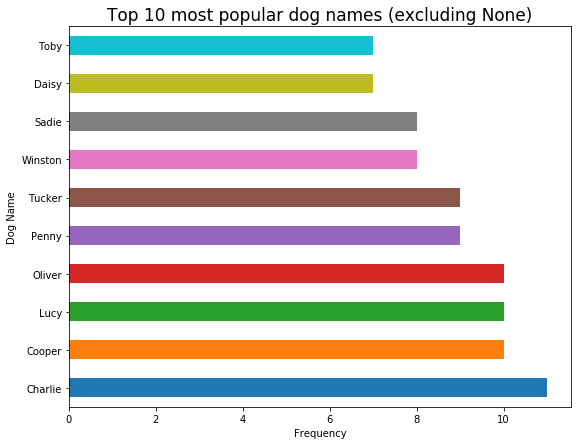

In [37]:
final_df.name.value_counts()[1:11].plot('barh')

# naming the line chart
plt.title("Top 10 most popular dog names (excluding None)", fontsize=17)
# adding y-axis labels
plt.ylabel('Dog Name')
# adding x-axis labels
plt.xlabel('Frequency')

### Insights:
1. There is a strong, positive correlation between retweets and favourite counts

2. Golden retrivers are the most rated dog breeds

3. The most popular dog name is Charlie, followed by Cooper, Lucy and Oliver.